In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_df = spark.table("db_pegah.default.heart_disease")
df = data_df.toPandas()
print("data shape:", df.shape)
df.head()

data shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#summary of dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#missing values
print("check for missing values:")
df.isna().any()

check for missing values:


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
#statistical properties
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


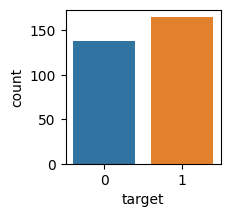

,Counts,Percentage
1,165,54.455446
0,138,45.544554


In [ ]:
#distribution of the target variable
plt.figure(figsize=(2,2))
sns.countplot(x='target' , data = df)
plt.show()
count = df['target'].value_counts()
percentage = df['target'].value_counts(normalize=True) * 100
pd.DataFrame({'Counts' : count , 'Percentage' : percentage})

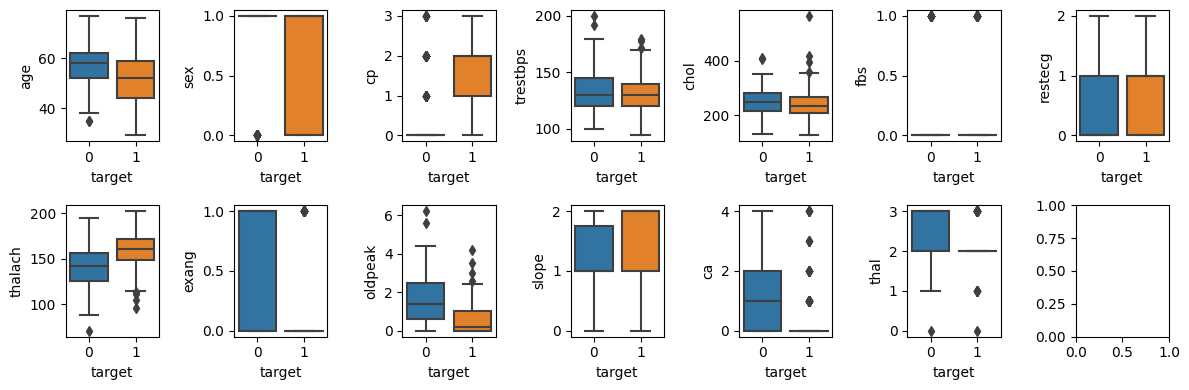

In [ ]:
#Feature Distribution Analysis
fig_dim = (2,7)
fig, axes = plt.subplots(fig_dim[0] , fig_dim[1] , figsize=(12, 4))
feature = [col for col in df.columns if col != 'target']
for idx, col in enumerate(feature):
    ax = axes[idx // fig_dim[1], idx % fig_dim[1]]
    sns.boxplot(x=df['target'], y=df[col], ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df.corr()
pd.DataFrame(correlation_matrix['target']).sort_values(by='target', ascending=False)

,target
target,1.000000
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trestbps,-0.144931
age,-0.225439
sex,-0.280937


Several features seem to be strong predictors of the target variable. The cp and thalach variables exhibit the highest positive correlations with the target, suggesting that they are key indicators. Conversely, features like exang and oldpeak show strong negative correlations, highlighting their significant role in predicting the target's outcome.

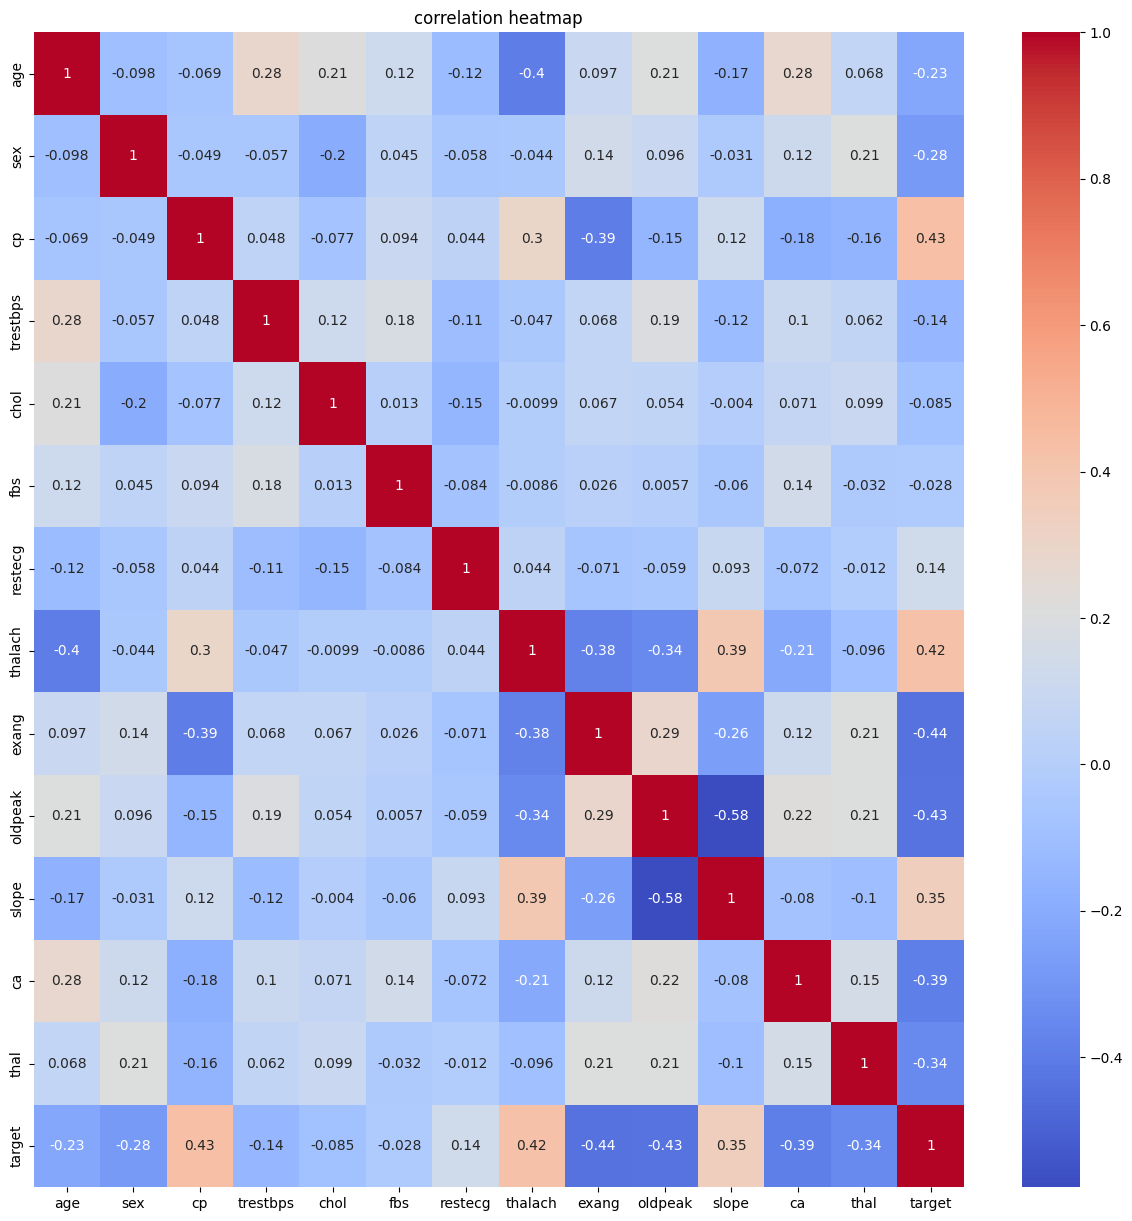

In [ ]:
#Variable Relationships & Correlation 
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True , cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()